# Part 1: Data

First, I have to find a dataset that has tabular data and explore its features

In [1]:
from fastai.tabular.all import *


This is a mushroom Classification dataset I already had. I decided to play around with analyzing it as if I knew nothing about the data.

In [2]:
df = pd.read_csv("agaricus-lepiota.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mushroomRows = ['edible or poisonous', 'cap shape', 'cap surface', ' cap color', 'bruises', 'odor', 'gill attachment', 'gill spacing', 'gill size', 'gill color', 'stalk shape', 'stalk root', 
                'stalk surface above the ring', 'stalk surface below the ring', 'stalk color below the ring', 'stalk color above the ring', 'veil type', 'veil color', 
                'ring number', 'ring type', 'spore print color', 'population', 'habitat'] #names of categories for mushrooms

In [4]:
df.columns = mushroomRows

In [5]:
df.info

<bound method DataFrame.info of      edible or poisonous cap shape cap surface  cap color bruises odor  \
0                      p         x           s          n       t    p   
1                      e         x           s          y       t    a   
2                      e         b           s          w       t    l   
3                      p         x           y          w       t    p   
4                      e         x           s          g       f    n   
...                  ...       ...         ...        ...     ...  ...   
8119                   e         k           s          n       f    n   
8120                   e         x           s          n       f    n   
8121                   e         f           s          n       f    n   
8122                   p         k           y          n       f    y   
8123                   e         x           s          n       f    n   

     gill attachment gill spacing gill size gill color  ...  \
0               

In [6]:
df.population.unique()

array(['s', 'n', 'a', 'v', 'y', 'c'], dtype=object)

In [7]:
df["cap shape"].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [8]:
df[mushroomRows] = df[mushroomRows].astype('category')

In [9]:
df[mushroomRows[0]].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8124 entries, 0 to 8123
Series name: edible or poisonous
Non-Null Count  Dtype   
--------------  -----   
8124 non-null   category
dtypes: category(1)
memory usage: 8.2 KB


In [10]:
df[mushroomRows[0]].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8124 entries, 0 to 8123
Series name: edible or poisonous
Non-Null Count  Dtype   
--------------  -----   
8124 non-null   category
dtypes: category(1)
memory usage: 8.2 KB


In [11]:
df[mushroomRows[0]].cat.codes.head()

0    1
1    0
2    0
3    1
4    0
dtype: int8

[Text(0.5, 1.0, 'Dependent Variable: Edible or Poisonous')]

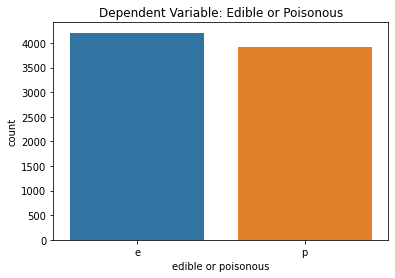

In [12]:
import seaborn as sns

sns.countplot(data=df, x=mushroomRows[0]).set(title="Dependent Variable: Edible or Poisonous")

Now I know the data has about an even split for edible and poisonous mushrooms, I can look at some of the other columns and see how the categories fair there.

<AxesSubplot:xlabel=' cap color', ylabel='count'>

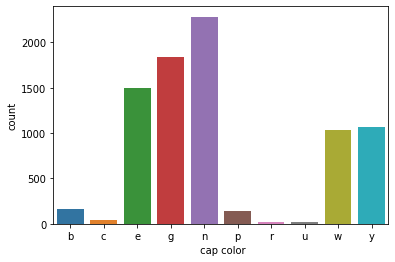

In [13]:
sns.countplot(data=df, x=mushroomRows[3])

<AxesSubplot:xlabel='stalk color below the ring', ylabel='count'>

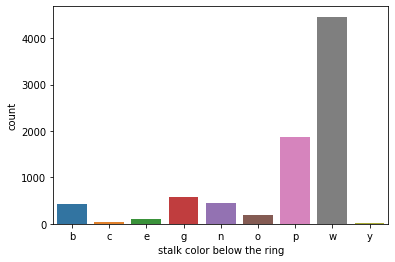

In [14]:
sns.countplot(data=df, x=mushroomRows[14])

<AxesSubplot:xlabel='spore print color', ylabel='count'>

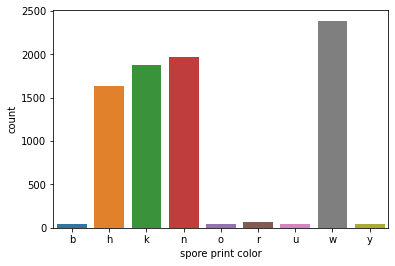

In [15]:
sns.countplot(data=df, x=mushroomRows[20])

Just taking a look at a few columns, it's pretty clear that most have wildly uneven distributions.

In [16]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42)
trn_df,val_df = train_test_split(df, test_size=0.25)
trn_df[mushroomRows] = trn_df[mushroomRows].apply(lambda x: x.cat.codes)
val_df[mushroomRows] = val_df[mushroomRows].apply(lambda x: x.cat.codes)

In [17]:
trn_df

,edible or poisonous,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below the ring,stalk color below the ring,stalk color above the ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
3887,1,5,2,8,0,1,1,0,1,5,...,2,7,7,0,2,1,4,3,3,0
4119,1,2,0,9,0,2,1,0,0,3,...,1,4,0,0,2,1,2,1,4,1
1600,0,5,3,3,1,5,1,0,0,5,...,2,6,3,0,2,1,4,2,5,0
4988,1,5,3,9,0,2,1,0,0,7,...,1,4,4,0,2,1,2,1,5,4
6757,1,2,3,4,0,2,1,0,1,0,...,1,7,6,0,2,1,0,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,1,5,3,4,0,2,1,0,1,0,...,2,6,7,0,2,1,0,7,4,4
5390,0,3,3,2,1,5,1,0,0,10,...,2,7,2,0,2,2,0,7,1,6
860,0,2,3,4,1,3,1,0,0,10,...,3,7,7,0,2,1,4,3,5,4
7603,1,3,2,2,0,2,1,0,1,0,...,2,6,6,0,2,1,0,7,4,4


In [18]:
cont,cat = cont_cat_split(df, 1, dep_var=mushroomRows[0])

In [19]:
trn_df.index

Int64Index([3887, 4119, 1600, 4988, 6757, 3128, 5891, 6838, 4617, 3761,
            ...
            6265, 5734, 3092, 3772, 5191, 5226, 5390,  860, 7603, 7270],
           dtype='int64', length=6093)

In [20]:
splits = (list(trn_df.index), list(val_df.index))

In [21]:
procs = [Categorify, FillMissing]

In [22]:
to = TabularPandas(df, procs, cat, cont, y_names=mushroomRows[0], splits=splits)

In [23]:
save_pickle('mushroom.pkl',to)

In [24]:
## Part 2: Random Forest 

In [25]:
mushroom = load_pickle('mushroom.pkl')

In [26]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
m = DecisionTreeClassifier(max_leaf_nodes=4)
m.fit(xs, y);

In [28]:
from fastbook import *

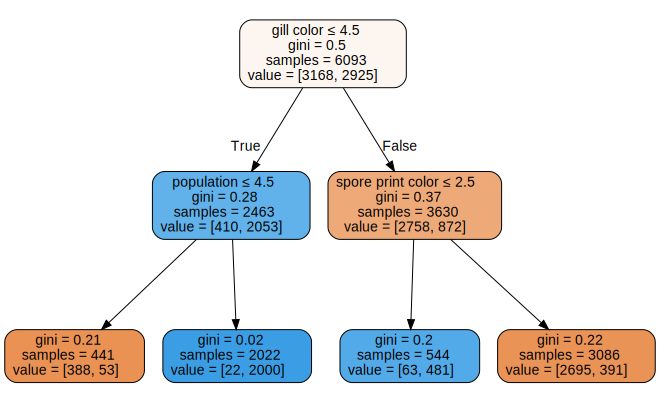

In [29]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

In [30]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [31]:
m_rmse(m, xs, y)

0.294654

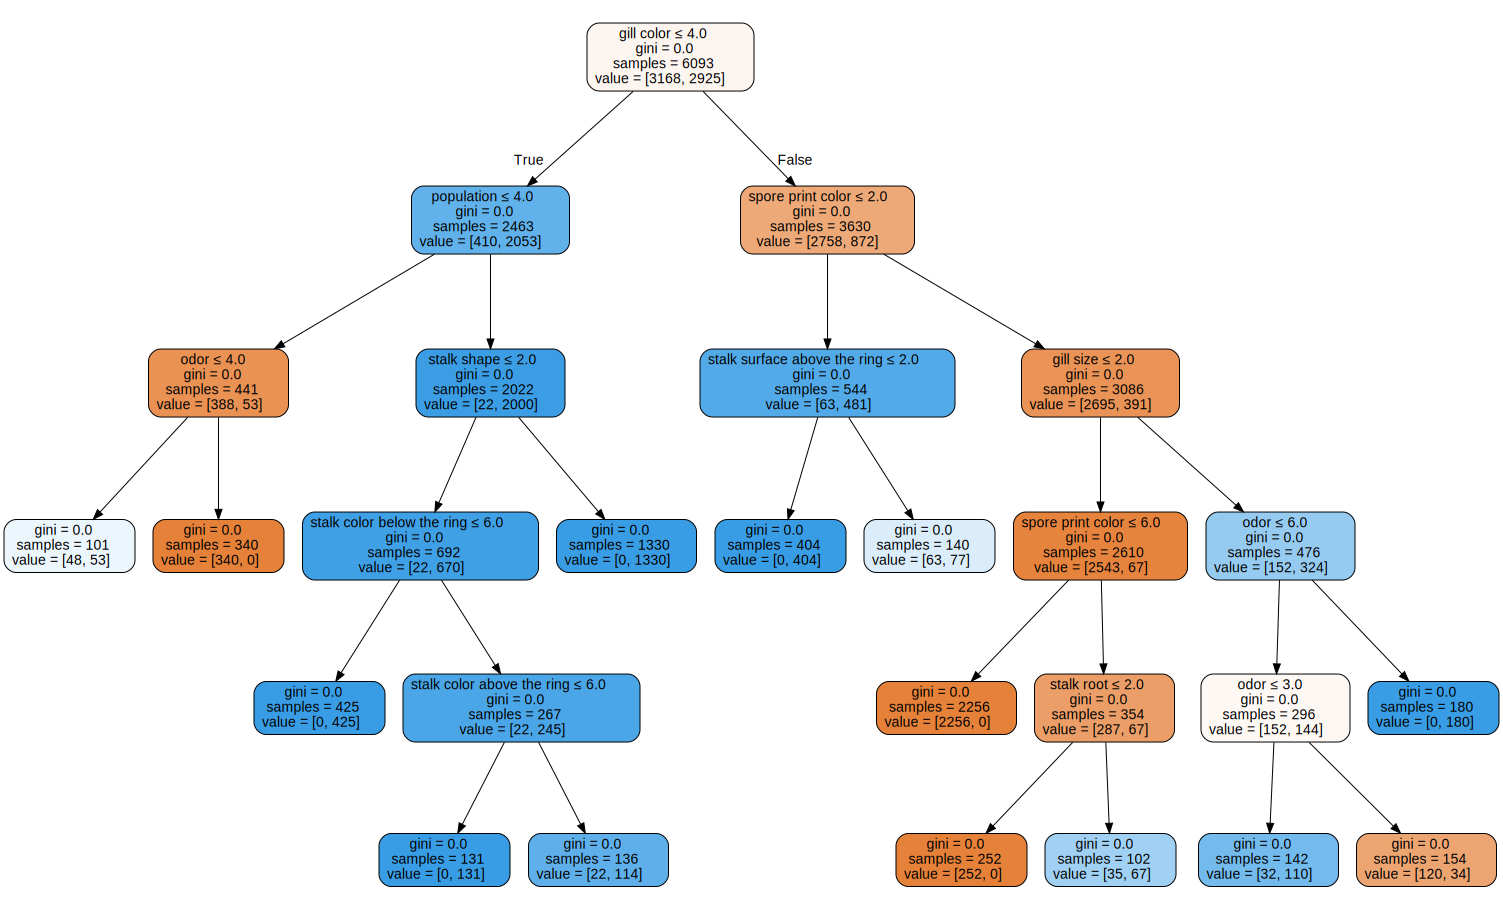

In [32]:
m = DecisionTreeClassifier(min_samples_leaf=100)
m.fit(xs, y)
draw_tree(m, xs, size=25)

In [33]:
m_rmse(m, xs, y)

0.195971

In [34]:
m_rmse(m, valid_xs, valid_y)

0.215134

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
def rf(xs, y, n_estimators=40, max_samples=6093,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [36]:
m = rf(xs, y)

In [37]:
m.fit(xs, y);

In [38]:
mean_absolute_error(y, m.predict(xs))

0.0

In [39]:
mean_absolute_error(valid_y, m.predict(valid_xs))

0.0

In [40]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without featu

In [41]:
r_mse(preds.mean(0), valid_y)

0.013622

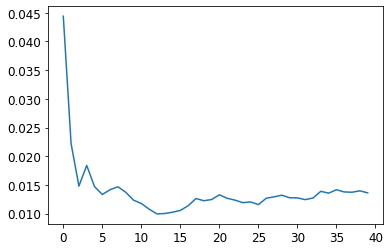

In [42]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [43]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [44]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
4,odor,0.228368
8,gill color,0.200356
19,spore print color,0.105279
7,gill size,0.097535
20,population,0.089184
10,stalk root,0.056267
6,gill spacing,0.040737
18,ring type,0.040469
11,stalk surface above the ring,0.028178
9,stalk shape,0.017771


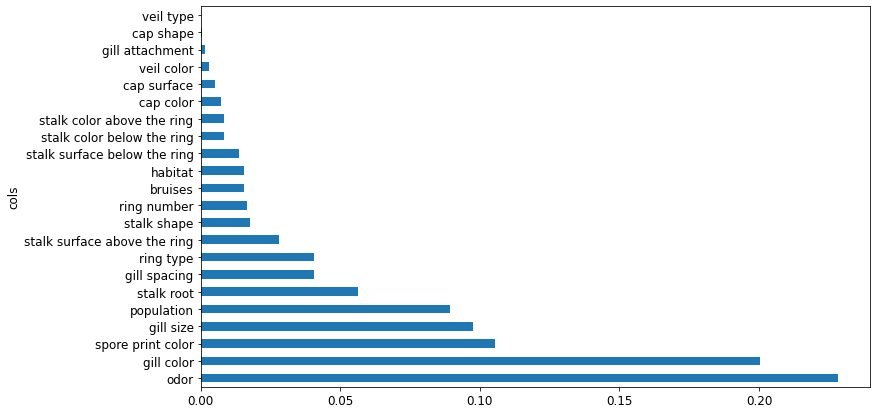

In [45]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [46]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

18

In [47]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [48]:
m = rf(xs_imp, y)

In [49]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.0, 0.0)

In [50]:
len(xs.columns), len(xs_imp.columns)

(22, 18)

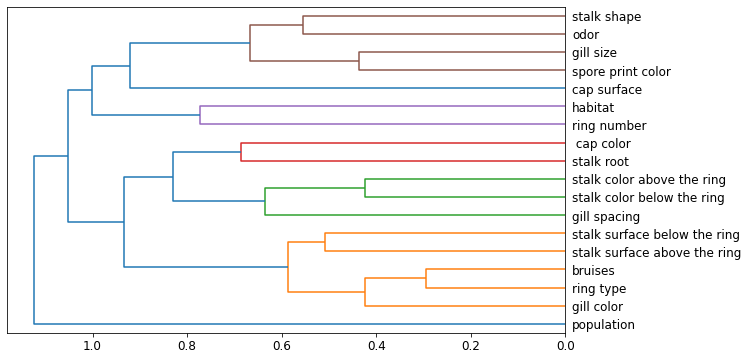

In [51]:
cluster_columns(xs_imp)

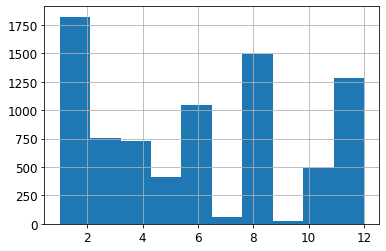

In [52]:

ax = mushroom['gill color'].hist()

In [53]:
save_pickle("mushroom_final.pkl", xs_imp)

In [54]:
mushroom2 = load_pickle("mushroom_final.pkl")

In [55]:
xs[["odor","gill color"]]

,odor,gill color
3887,2,6
4119,3,4
1600,6,6
4988,3,8
6757,3,1
...,...,...
5226,3,1
5390,6,11
860,4,11
7603,3,1


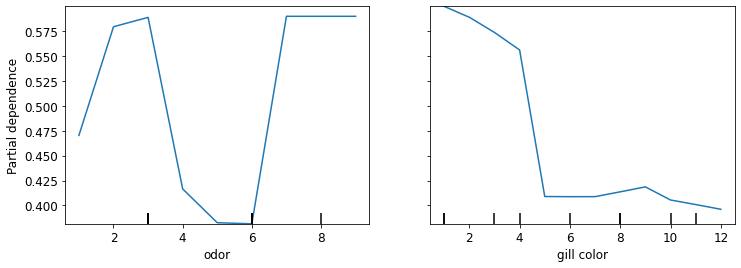

In [56]:
from sklearn.inspection import PartialDependenceDisplay

fig,ax = plt.subplots(figsize=(12, 4))
PartialDependenceDisplay.from_estimator(m, mushroom2, mushroom2[["odor", "gill color"]],
                        grid_resolution=20, ax=ax);

### Compare to Deep Learning

In [59]:
dls = to.dataloaders(bs=64)

In [62]:
learn = tabular_learner(dls, metrics=accuracy)

In [64]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.003987,0.000673,1.000000,00:01
1,0.001382,0.000442,1.000000,00:01


In [65]:
learn.show_results()

,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,stalk shape,stalk root,stalk surface above the ring,stalk surface below the ring,stalk color below the ring,stalk color above the ring,veil type,veil color,ring number,ring type,spore print color,population,habitat,edible or poisonous,edible or poisonous_pred
0,3,4,3,2,6,2,1,1,8,2,2,3,3,8,4,1,3,2,5,3,5,1,0,0
1,3,4,10,1,3,2,1,1,8,1,2,2,2,1,5,1,3,2,3,2,6,5,1,1
2,6,1,4,1,3,2,1,1,8,1,2,2,2,5,1,1,3,2,3,2,5,5,1,1
3,6,4,3,1,8,2,1,2,1,2,1,3,3,7,7,1,3,2,1,8,5,1,1,1
4,6,4,4,1,3,2,1,1,8,1,2,2,2,5,5,1,3,2,3,2,6,5,1,1
5,4,4,2,1,5,1,1,1,12,1,3,2,4,2,2,1,3,1,4,8,2,1,1,1
6,3,3,4,2,3,2,1,1,11,2,2,3,1,8,8,1,3,2,5,2,4,2,1,1
7,3,4,10,1,3,2,1,1,3,1,2,2,2,1,7,1,3,2,3,2,5,1,1,1
8,6,4,3,2,6,2,1,1,8,2,2,3,3,7,4,1,3,2,5,3,5,1,0,0
